In [ ]:
# tensorflow 러닝레이트 관련 실습


In [1]:
# 1. 필요한 패키지 가져오는 코드 

import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써플로우에 내장되어있는 
                                                                         # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense  # 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one hot encoding 하는 모듈
from tensorflow.keras import backend as K    # 텐써 플로우를 사용하지 않았을때의 코드로 구현할 수 있게 하는 코드
from tensorflow.keras.layers import Dense, Flatten

tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')  # mnist 데이터 로드

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# 2. 정규화 진행 

# 3차원 ---> 2차원으로 차원축소하고서 정규화 진행  ( 한 픽셀이 0~255 로 되어있는데)
# 0 ~ 1 사이로 변경 
x_train = (x_train.reshape((60000, 28 * 28))) / 255 
x_test = (x_test.reshape((10000, 28 * 28))) / 255

# 3. 정답 데이터를 준비한다. 

# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

In [3]:
# 4. 모델을 구성합니다. 3층 신경망으로 구성

model = Sequential()
model.add(Flatten(input_shape = (784,)))
model.add(Dense(100, activation = 'relu'))  # 2층 
model.add(Dense(10, activation = 'softmax'))  # 3층 출력층 

In [4]:
# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )

model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])  # 학습과정에서 정확도를 보려고 

In [ ]:
#6. 모델을 훈련 시킵니다.
K.set_value(model.optimizer.learning_rate, 0.01)         # 러닝레이트를 0.01 로 지정하겠다.
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

history=model.fit( x_train, y_train, epochs=30, batch_size=100)

In [6]:
# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.4046 - acc: 0.9707


[0.4046446681022644, 0.9707000255584717]

In [7]:
# 8.테스트 데이터의 예측값을 출력합니다. 

results = model.predict(x_test)


In [8]:
#9. 정확도를 확인합니다.
import numpy as np
y_hat = np.argmax(results, axis=1)
y_label = np.argmax(y_test,axis=1)
print ( np.sum( y_hat == y_label ) / len(y_test) )

0.9707


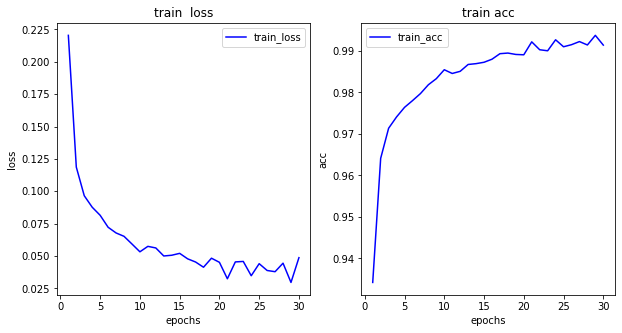

In [9]:
# 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.set_title('train  loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.set_title('train acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# 러닝레이트를 0.5 로 하고 수행하시오

#6. 모델을 훈련 시킵니다.
K.set_value(model.optimizer.learning_rate, 0.5)         # 러닝레이트를 0.5 로 지정하겠다.

history=model.fit( x_train, y_train, epochs=30, batch_size=100)

In [11]:
# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

model.evaluate(x_test, y_test)

# 8.테스트 데이터의 예측값을 출력합니다. 

results = model.predict(x_test)

#9. 정확도를 확인합니다.

import numpy as np
y_hat = np.argmax(results, axis=1)
y_label = np.argmax(y_test,axis=1)
print ( np.sum( y_hat == y_label ) / len(y_test) )

313/313 [==============================] - 0s 1ms/step - loss: 2.3397 - acc: 0.0982
0.0982


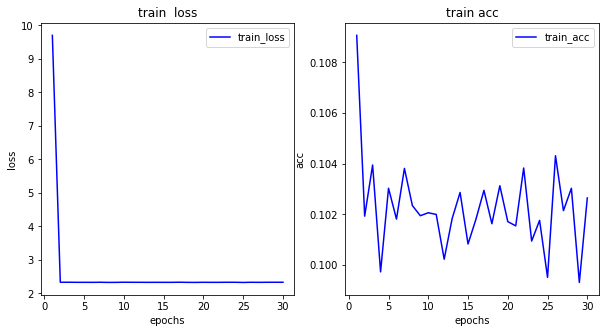

In [12]:
# 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.set_title('train  loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.set_title('train acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# ※ 설명 : 0.5 로 러닝 레이트를 주었더니 수렴하지 못하고 발산하였습니다.
# 적절한 러닝 레이터값을 지정해줘야 합니다.

In [ ]:
# ▩ 경사하강법

# 오차가 최소화 되는 지점을 찾아가기 위해 아래로 내려오는 방법들

# 1. SGD ( Stochastric Gradient Descent ) : 확률적 경사 감소법
# 	GD ( Gradient Descent )는 학습 데이터를 다 입력하고 한 걸음 이동하는 경사감소법입니다.
# 	그래서 GD 는 학습하는데 시간이 많이 걸립니다. 그래서 나온게 확률적 경사감소법인데
# 미니배치 + GD 로 데이터를 배치단위로 추출해서 학습하면서 경사하강하는 경사하강법

# 	SGD 는 아래로 내려올때 심하게 지그제그로 내려옵니다. 배치의 크기가 크면 지그제그의 정도가
# 	덜하는데 배치의 크기가 작으면 술취한 사람처럼 지그제그로 내려옵니다.
	
# SGD 의 문제점 ? Local minimum 에 잘 빠집니다.

In [ ]:
# 2. momentum : 관성을 이용해서 localminimum 을 빠져나가게 설계된 경사하강법입니다.
# 			텐써플로우 2.0에는 모멘텀이 따로없지만 Adam 에 모멘텀의 장점이 포함되어져
#       있습니다.

In [ ]:
	# 3. Adagrade : 학습률(learning rate) 을 자동조절되게 하는 경사하강법입니다.
	# 	    산위에 있을때는 발검을을 크게해서 내려오고 목적지에 도달했을 때는 
  #       총총 발걸음으로 내려오는게 Adagrade 입니다.

In [ ]:
	# 4. Adam : momentum의 장점 + Adagrade 의 장점을 살린 경사하강법
	#           			↓                              ↓
#                관성을 이용                 러닝레이트가 자동조절

In [ ]:
# 5. RmSprop : Adagrade 의 장점을 더 좋게 만든 경사하강법입니다.
#			   발걸음이 자동조절되는데 목표지점에 도달할때 이전에 내려오던
#        그 걸음걸이를 살펴서 발걸음(러닝레이트)를 조절합니다.

In [ ]:
# 텐써 플로우 2.0 에서 경사하강법의 종류를 기술하는 코드 :
	
# model.complie( optimizer = 'Adagrade',         <----------- Adam, SGD, RMSprop
# 				loss = 'categorical_crossentropy',
#         metrics = ['acc'] )